In [1]:
from utils import read_data
from utils import result

import xgboost as xgb

import tensorflow as tf

import os
import pandas as pd
import re
import string
import numpy as np
import json

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from gensim.models import doc2vec
import gensim
import random
from tqdm import tqdm
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

/opt/homebrew/anaconda3/envs/tf/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [20]:
plt.style.use('ggplot')

In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
train_sentence, test_sentence, sarcasm_sentence, train_token, test_token, sarcasm_token, y_train, y_test, y_sarcasm = read_data()

In [4]:
stwords = set(stopwords.words('english'))

In [5]:
def top_token(text, y, label=0, top=100):
    cnt = Counter()
    for i in range(len(text)):
        tweet = text[i]
        if y[i] == label:
            for token in tweet:
                cnt[token] += 1
    return cnt.most_common(top)

In [18]:
def rule_based(top=100):
    postop = set([i[0] for i in top_token(train_token, y_train, label=2, top=top)])
    negtop = set([i[0] for i in top_token(train_token, y_train, label=1, top=top)])
    neutop = set([i[0] for i in top_token(train_token, y_train, label=0, top=top)])

    pred = np.zeros(shape=y_test.shape)
    pred_sarcasm = np.zeros(shape=y_sarcasm.shape)

    for i in range(len(test_token)):
        tweet = test_token[i]
        score = np.array([0, 0, 0])
        for token in tweet:
            if token in postop:
                score[2] += 1
            if token in negtop:
                score[1] += 1
            if token in neutop:
                score[0] += 1
            pred[i] = score.argmax()

    for i in range(len(sarcasm_token)):
        tweet = sarcasm_token[i]
        score = np.array([0, 0, 0])
        for token in tweet:
            if token in postop:
                score[2] += 1
            if token in negtop:
                score[1] += 1
            if token in neutop:
                score[0] += 1
            pred_sarcasm[i] = score.argmax()

    return(result(y_test, y_sarcasm, pred, pred_sarcasm, show=False))

In [43]:
score = np.array([2, 2, 2])

0

In [16]:
rule_based(top=10)

Average Accuracy is 0.4230845771144279
Average Recall is 0.35204699070298223
F1-Score is 0.1456033073787583
Average Accuracy on sarcasm dataset is 0.2441860465116279
Average Recall on sarcasm dataset is 0.37422299922299923
F1-Score on sarcasm dataset is 0.22195121951219512


In [8]:
rule_based(top=5)

Average Accuracy is 0.4309452736318408
Average Recall is 0.33953880977795947
F1-Score is 0.06022052586938083
Average Accuracy on sarcasm dataset is 0.1744186046511628
Average Recall on sarcasm dataset is 0.3326923076923077
F1-Score on sarcasm dataset is 0.06249999999999999


In [9]:
rule_based(top=50)

Average Accuracy is 0.5103482587064677
Average Recall is 0.4394643702610723
F1-Score is 0.31115155167842734
Average Accuracy on sarcasm dataset is 0.29069767441860467
Average Recall on sarcasm dataset is 0.3973193473193473
F1-Score on sarcasm dataset is 0.281283422459893


In [10]:
rule_based(top=70)

Average Accuracy is 0.5086567164179104
Average Recall is 0.4499947530904731
F1-Score is 0.3339690612417885
Average Accuracy on sarcasm dataset is 0.3372093023255814
Average Recall on sarcasm dataset is 0.4324203574203574
F1-Score on sarcasm dataset is 0.3484848484848485


In [11]:
rule_based(top=100)

Average Accuracy is 0.5207960199004975
Average Recall is 0.4704041482592877
F1-Score is 0.37421608803659223
Average Accuracy on sarcasm dataset is 0.3488372093023256
Average Recall on sarcasm dataset is 0.4096736596736597
F1-Score on sarcasm dataset is 0.3854679802955665


In [12]:
rule_based(top=150)

Average Accuracy is 0.5176119402985074
Average Recall is 0.4676840599117173
F1-Score is 0.3789607369200468
Average Accuracy on sarcasm dataset is 0.3023255813953488
Average Recall on sarcasm dataset is 0.3745726495726496
F1-Score on sarcasm dataset is 0.3217306441119063


In [13]:
rule_based(top=200)

Average Accuracy is 0.5066666666666667
Average Recall is 0.46267668086298314
F1-Score is 0.36514427769037194
Average Accuracy on sarcasm dataset is 0.4186046511627907
Average Recall on sarcasm dataset is 0.4995920745920746
F1-Score on sarcasm dataset is 0.46232439335887615


In [14]:
rule_based(top=1000)

Average Accuracy is 0.5164179104477612
Average Recall is 0.4840206014245709
F1-Score is 0.3994208831531914
Average Accuracy on sarcasm dataset is 0.32558139534883723
Average Recall on sarcasm dataset is 0.42055167055167053
F1-Score on sarcasm dataset is 0.34340456890198967


In [19]:
avg_acc = []
avg_recall = []
f1 = []
avg_acc_sarcasm = []
avg_recall_sarcasm = []
f1_sarcasm = []

for t in [5, 10, 50, 100, 150, 200, 1000]:
    r1, r2, r3, r4, r5, r6 = rule_based(top=t)
    avg_acc.append(r1)
    avg_recall.append(r2)
    f1.append(r3)
    avg_acc_sarcasm.append(r4)
    avg_recall_sarcasm.append(r5)
    f1_sarcasm.append(r6)

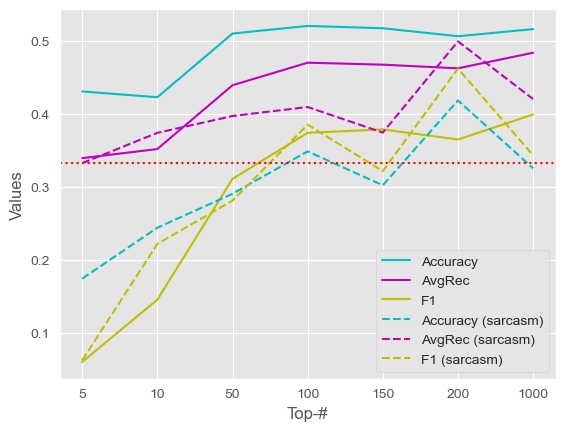

In [42]:
top = ['5', '10', '50', '100', '150', '200', '1000']

x = np.arange(7)
plt.plot(x, avg_acc, 'c', label='Accuracy')
plt.plot(x, avg_recall, 'm', label='AvgRec')
plt.plot(x, f1, 'y', label='F1')
plt.plot(x, avg_acc_sarcasm, 'c--', label='Accuracy (sarcasm)')
plt.plot(x, avg_recall_sarcasm, 'm--', label='AvgRec (sarcasm)')
plt.plot(x, f1_sarcasm, 'y--', label='F1 (sarcasm)')
plt.xticks(np.arange(7), top)
plt.legend()
plt.axhline(y=1/3, color='r', linestyle='dotted')
plt.xlabel("Top-#")
plt.ylabel("Values")
plt.savefig('rulebased.png', dpi=1000)
plt.show()